<a href="https://colab.research.google.com/github/ssotom/st0263-bigdata/blob/master/project-3/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.6.tgz
!tar xf spark-2.4.5-bin-hadoop2.6.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.6"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [0]:
# Import some libraries
import pandas as pd
import matplotlib.pyplot as plt

# Global

## Confirmed cases

In [4]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2020-05-13 22:17:16--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101161 (99K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>]  98.79K  --.-KB/s    in 0.04s   

2020-05-13 22:17:16 (2.60 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [101161/101161]



In [5]:
# Load csv Dataset 
confirmed_global = spark.read.csv('/content/time_series_covid19_confirmed_global.csv', inferSchema=True, header=True)
# Shape of dataset
print((confirmed_global.count(), len(confirmed_global.columns)))
# Fisrt few rows of dataframe
confirmed_global.show(5)

(266, 116)
+--------------+--------------+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+
|Province/State|Country/Region|     Lat|   Long|1/22/20|1/23/20|1/24/20|1/25/20|

In [6]:
# Sum confirmed cases of all countries
confirmed_global_last_day = confirmed_global.select(confirmed_global.columns[-1])
confirmed_global_total = confirmed_global_last_day.groupBy().sum().collect()[0][0]
print('Total confirmed global:', confirmed_global_total)

Total confirmed global: 4261747


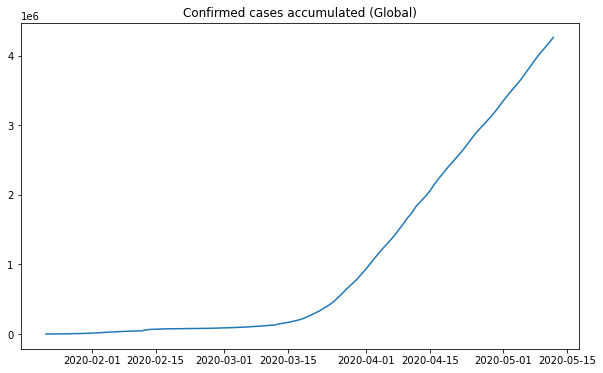

In [7]:
confirmed_global_columns = confirmed_global.columns[4:]
# Get sum of confirmed cases by day
confirmed_global_2 = confirmed_global.select(confirmed_global_columns).groupBy().sum()

# Dataframe to pandas
confirmed_global_2_pandas = confirmed_global_2.toPandas()
confirmed_global_2_pandas.columns = confirmed_global_columns
confirmed_global_2_pandas = confirmed_global_2_pandas.T
confirmed_global_2_pandas.index = pd.to_datetime(confirmed_global_2_pandas.index)

# Plotting data
plt.figure(1, figsize=(10,6))
plt.plot(confirmed_global_2_pandas)
plt.title('Confirmed cases accumulated (Global)')
plt.show()

## Deaths

In [8]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

--2020-05-13 22:17:36--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76759 (75K) [text/plain]
Saving to: ‘time_series_covid19_deaths_global.csv’

time_series_covid19 100%[===================>]  74.96K  --.-KB/s    in 0.03s   

2020-05-13 22:17:36 (2.61 MB/s) - ‘time_series_covid19_deaths_global.csv’ saved [76759/76759]



In [9]:
# Load csv Dataset 
deaths_global = spark.read.csv('/content/time_series_covid19_deaths_global.csv',inferSchema=True,header=True)
# Shape of dataset
print((deaths_global.count(), len(deaths_global.columns)))
#fisrt few rows of dataframe
deaths_global.show(5)

(266, 116)
+--------------+--------------+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+
|Province/State|Country/Region|     Lat|   Long|1/22/20|1/23/20|1/24/20|1/25/20|

In [10]:
# Sum deaths of all countries
deaths_global_last_day = deaths_global.select(deaths_global.columns[-1])
deaths_global_total = deaths_global_last_day.groupBy().sum().collect()[0][0]
print('Total deaths global:', deaths_global_total)

Total deaths global: 291942


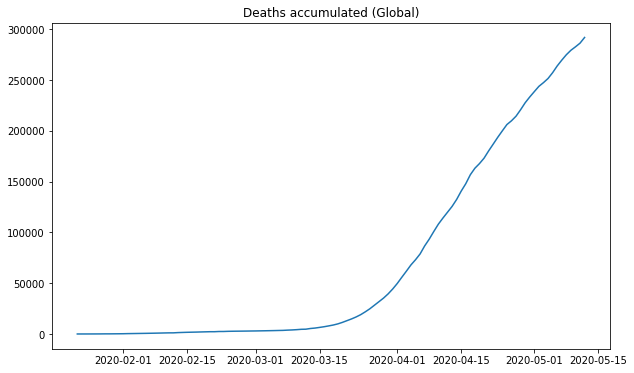

In [11]:
deaths_global_columns = deaths_global.columns[4:]
# Get sum of deaths by day
deaths_global_2 = deaths_global.select(deaths_global_columns).groupBy().sum()

# Dataframe to pandas
deaths_global_2_pandas = deaths_global_2.toPandas()
deaths_global_2_pandas.columns = deaths_global_columns
deaths_global_2_pandas = deaths_global_2_pandas.T
deaths_global_2_pandas.index = pd.to_datetime(deaths_global_2_pandas.index)

# Plotting data
plt.figure(2, figsize=(10,6))
plt.plot(deaths_global_2_pandas)
plt.title('Deaths accumulated (Global)')
plt.show()

## Recovered

In [12]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

--2020-05-13 22:17:41--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85266 (83K) [text/plain]
Saving to: ‘time_series_covid19_recovered_global.csv’

time_series_covid19 100%[===================>]  83.27K  --.-KB/s    in 0.03s   

2020-05-13 22:17:41 (2.69 MB/s) - ‘time_series_covid19_recovered_global.csv’ saved [85266/85266]



In [13]:
# Load csv Dataset 
recovered_global = spark.read.csv('/content/time_series_covid19_recovered_global.csv',inferSchema=True,header=True)
# Shape of dataset
print((recovered_global.count(), len(recovered_global.columns)))
#fisrt few rows of dataframe
recovered_global.show(5)

(252, 116)
+--------------+--------------+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+
|Province/State|Country/Region|     Lat|   Long|1/22/20|1/23/20|1/24/20|1/25/20|

In [14]:
# Sum deaths of all countries
recovered_global_last_day = recovered_global.select(recovered_global.columns[-1])
recovered_global_total = recovered_global_last_day.groupBy().sum().collect()[0][0]
print('Total recovered global:', recovered_global_total)

Total recovered global: 1493414


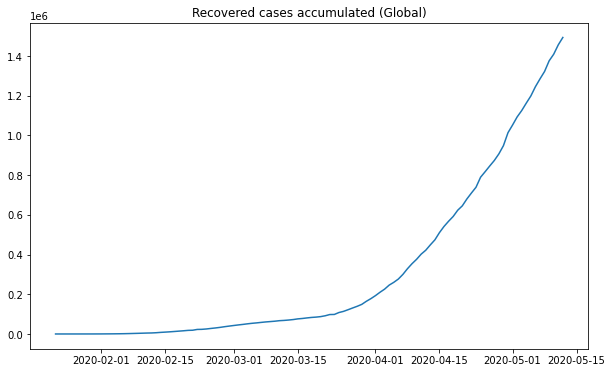

In [15]:
recovered_global_columns = recovered_global.columns[4:]
# Get sum of deaths by day
recovered_global_2 = recovered_global.select(recovered_global_columns).groupBy().sum()

# Dataframe to pandas
recovered_global_2_pandas = recovered_global_2.toPandas()
recovered_global_2_pandas.columns = recovered_global_columns
recovered_global_2_pandas = recovered_global_2_pandas.T
recovered_global_2_pandas.index = pd.to_datetime(recovered_global_2_pandas.index)

# Plotting data
plt.figure(3, figsize=(10,6))
plt.plot(recovered_global_2_pandas)
plt.title('Recovered cases accumulated (Global)')
plt.show()

## Summary

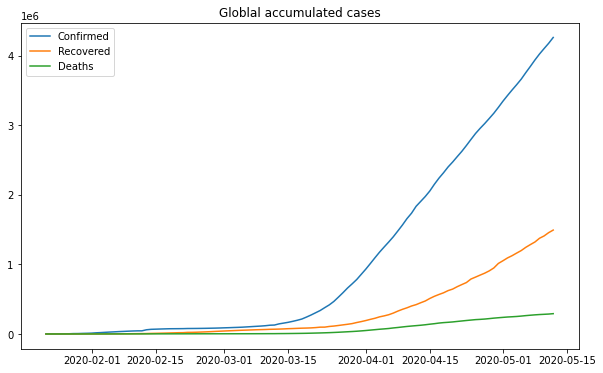

In [16]:
# Plotting data
plt.figure(4, figsize=(10,6))
plt.plot(confirmed_global_2_pandas, label='Confirmed')
plt.plot(recovered_global_2_pandas, label='Recovered')
plt.plot(deaths_global_2_pandas, label='Deaths')
plt.title('Globlal accumulated cases')
plt.legend(loc='upper left')
plt.show()

# Colombia

In [17]:
!wget https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv

--2020-05-13 22:17:47--  https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv
Resolving www.datos.gov.co (www.datos.gov.co)... 52.206.140.205
Connecting to www.datos.gov.co (www.datos.gov.co)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [    <=>             ]   2.19M  2.01MB/s    in 1.1s    

2020-05-13 22:17:50 (2.01 MB/s) - ‘rows.csv’ saved [2297556]



In [18]:
# Load csv Dataset 
colombia = spark.read.csv('/content/rows.csv', inferSchema=True, header=True)
# Shape of dataset
print((colombia.count(), len(colombia.columns)))
#fisrt few rows of dataframe
colombia.show(5)

(12272, 16)
+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+--------------------+---------------+-------------------+--------------------+-------------------+
|ID de caso|Fecha de notificación|Codigo DIVIPOLA|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|    Estado|País de procedencia|                 FIS|Fecha de muerte|  Fecha diagnostico|    Fecha recuperado|  fecha reporte web|
+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+--------------------+---------------+-------------------+--------------------+-------------------+
|         1|  2020-03-02 00:00:00|          11001|        Bogotá D.C.|             Bogotá D.C.|Recuperado|  19|   F|  Importado|Recuperado|             Italia|2020-02-27T00:00:...|          -   -|2020-03-06 00:00:0

In [19]:
colombia = colombia.drop('Fecha de notificación','Codigo DIVIPOLA', 'FIS', 'fecha reporte web')
colombia.show(5)

+----------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+---------------+-------------------+--------------------+
|ID de caso|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|    Estado|País de procedencia|Fecha de muerte|  Fecha diagnostico|    Fecha recuperado|
+----------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+---------------+-------------------+--------------------+
|         1|        Bogotá D.C.|             Bogotá D.C.|Recuperado|  19|   F|  Importado|Recuperado|             Italia|          -   -|2020-03-06 00:00:00|2020-03-13T00:00:...|
|         2|Guadalajara de Buga|         Valle del Cauca|Recuperado|  34|   M|  Importado|Recuperado|             España|          -   -|2020-03-09 00:00:00|2020-03-19T00:00:...|
|         3|           Medellín|               Antioquia|Recuperado|  50|   F|  Importado|Recuperado|    

## By State

In [20]:
colombia_by_state = colombia.groupBy('Departamento o Distrito ').count().orderBy('count', ascending=False)
colombia_by_state.show(10)

# Dataframe to pandas
colombia_by_state_pandas = colombia_by_state.toPandas()[:10]
colombia_by_state_pandas.set_index("Departamento o Distrito ", inplace = True)

+------------------------+-----+
|Departamento o Distrito |count|
+------------------------+-----+
|             Bogotá D.C.| 4563|
|         Valle del Cauca| 1336|
|                    Meta|  935|
|     Cartagena D.T. y C.|  768|
|                Amazonas|  743|
|               Atlántico|  608|
|       Barranquilla D.E.|  516|
|               Antioquia|  481|
|                  Nariño|  338|
|            Cundinamarca|  309|
+------------------------+-----+
only showing top 10 rows



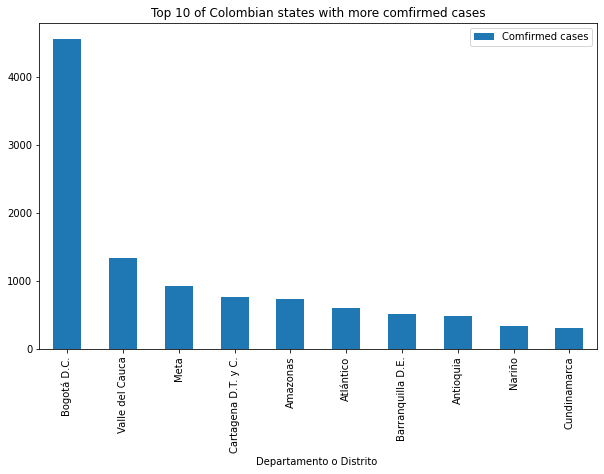

In [21]:
# Plotting data
colombia_by_state_pandas.plot.bar(figsize=(10,6)).legend(["Comfirmed cases"])
plt.title('Top 10 of Colombian states with more comfirmed cases')
plt.show()

In [22]:
# Recober cases by state
colombia_by_state2 = colombia.filter(colombia['Fecha recuperado']!='-   -').groupBy('Departamento o Distrito ').count().orderBy('count', ascending=False)
colombia_by_state2.show(10)

# Dataframe to pandas
colombia_by_state_2pandas = colombia_by_state2.toPandas()
colombia_by_state_2pandas.set_index("Departamento o Distrito ", inplace = True)

+------------------------+-----+
|Departamento o Distrito |count|
+------------------------+-----+
|             Bogotá D.C.| 1197|
|         Valle del Cauca|  412|
|               Antioquia|  290|
|            Cundinamarca|  151|
|     Cartagena D.T. y C.|  143|
|               Risaralda|  135|
|                   Huila|   61|
|       Barranquilla D.E.|   59|
|    Santa Marta D.T. ...|   58|
|                 Quindio|   54|
+------------------------+-----+
only showing top 10 rows



In [23]:
# Recober cases by state
colombia_by_state3 = colombia.filter(colombia['Fecha de muerte']!='-   -').groupBy('Departamento o Distrito ').count().orderBy('count', ascending=False)
colombia_by_state3.show(10)

# Dataframe to pandas
colombia_by_state_3pandas = colombia_by_state3.toPandas()
colombia_by_state_3pandas.set_index("Departamento o Distrito ", inplace = True)

+------------------------+-----+
|Departamento o Distrito |count|
+------------------------+-----+
|             Bogotá D.C.|  157|
|         Valle del Cauca|   78|
|     Cartagena D.T. y C.|   49|
|                Amazonas|   26|
|       Barranquilla D.E.|   24|
|               Atlántico|   18|
|                  Nariño|   18|
|    Santa Marta D.T. ...|   17|
|            Cundinamarca|   13|
|                   Cesar|   11|
+------------------------+-----+
only showing top 10 rows



In [24]:
colombia_by_state_pandas_merge = pd.merge(colombia_by_state_pandas, colombia_by_state_2pandas, left_index=True, right_index=True)
colombia_by_state_pandas_merge = pd.merge(colombia_by_state_pandas_merge, colombia_by_state_3pandas, left_index=True, right_index=True)
colombia_by_state_pandas_merge

,count_x,count_y,count
Departamento o Distrito,,,
Bogotá D.C.,4563,1197,157
Valle del Cauca,1336,412,78
Meta,935,42,6
Cartagena D.T. y C.,768,143,49
Amazonas,743,9,26
Atlántico,608,26,18
Barranquilla D.E.,516,59,24
Antioquia,481,290,6
Nariño,338,34,18


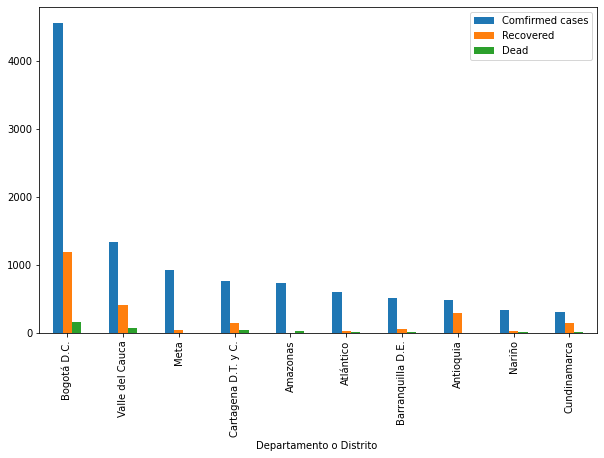

In [25]:
# Plotting data
colombia_by_state_pandas_merge.plot.bar(figsize=(10,6)).legend(["Comfirmed cases", "Recovered", "Dead"])
plt.show()

In [26]:
colombia_by_state_pandas_merge['real'] = colombia_by_state_pandas_merge['count_x'] - colombia_by_state_pandas_merge['count_y'] -colombia_by_state_pandas_merge['count']
colombia_by_state_pandas_merge2 = colombia_by_state_pandas_merge[['real']].sort_values(by=['real'], ascending=False)
colombia_by_state_pandas_merge2

,real
Departamento o Distrito,
Bogotá D.C.,3209
Meta,887
Valle del Cauca,846
Amazonas,708
Cartagena D.T. y C.,576
Atlántico,564
Barranquilla D.E.,433
Nariño,286
Antioquia,185


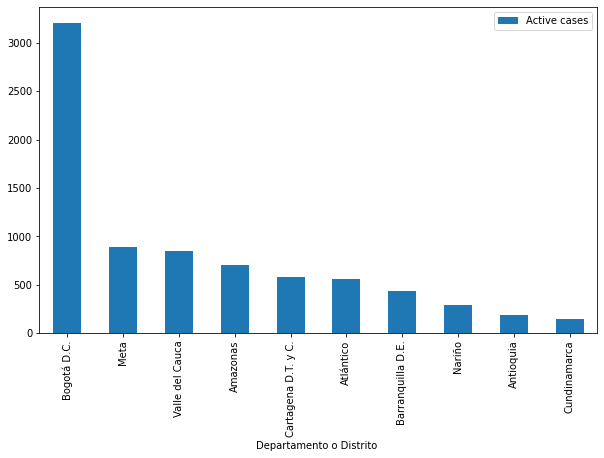

In [27]:
# Plotting data
colombia_by_state_pandas_merge2.plot.bar(figsize=(10,6)).legend(["Active cases"])
plt.show()

## By origin country

In [28]:
colombia_by_country = colombia.groupBy('País de procedencia').count().orderBy('count', ascending=False)
colombia_by_country.show(10)

# Dataframe to pandas
colombia_by_country_pandas = colombia_by_country.toPandas()[1:10]
colombia_by_country_pandas.set_index("País de procedencia", inplace = True)

+--------------------+-----+
| País de procedencia|count|
+--------------------+-----+
|            Colombia|11430|
|              España|  259|
|Estados Unidos de...|  216|
|             Ecuador|   50|
|              México|   47|
|              Brasil|   36|
|              Panamá|   34|
|             Turquía|   28|
|             Francia|   16|
|             Jamaica|   16|
+--------------------+-----+
only showing top 10 rows



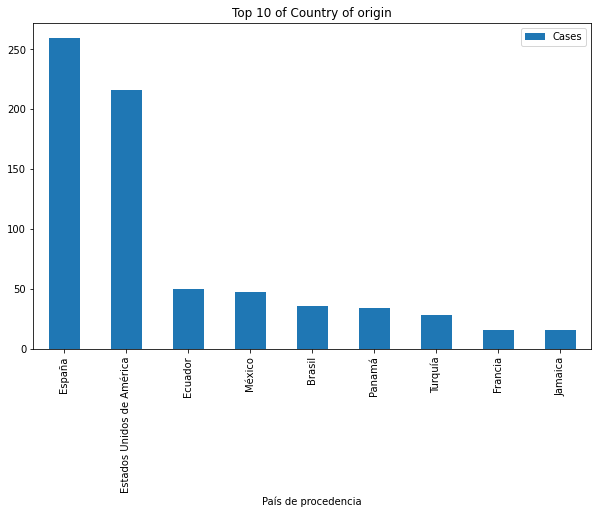

In [29]:
# Plotting data
colombia_by_country_pandas.plot.bar(figsize=(10,6)).legend(["Cases"])
plt.title('Top 10 of Country of origin')
plt.show()

## By Gender

In [30]:
colombia_by_sex = colombia.groupBy('sexo').count().orderBy('count', ascending=False)
colombia_by_sex.show(10)

# Dataframe to pandas
colombia_by_sex_pandas = colombia_by_sex.toPandas()[:2]
colombia_by_sex_pandas.set_index("sexo", inplace = True)

colombia_by_sex2 = colombia.filter(colombia['Fecha recuperado']!='-   -').groupBy('sexo').count().orderBy('count', ascending=False)
colombia_by_sex2.show(10)

# Dataframe to pandas
colombia_by_sex2_pandas = colombia_by_sex2.toPandas()[:2]
colombia_by_sex2_pandas.set_index("sexo", inplace = True)

colombia_by_sex3 = colombia.filter(colombia['Fecha de muerte']!='-   -').groupBy('sexo').count().orderBy('count', ascending=False)
colombia_by_sex3.show(10)

# Dataframe to pandas
colombia_by_sex3_pandas = colombia_by_sex3.toPandas()[:2]
colombia_by_sex3_pandas.set_index("sexo", inplace = True)

+----+-----+
|sexo|count|
+----+-----+
|   M| 6962|
|   F| 5306|
|   f|    3|
|   m|    1|
+----+-----+

+----+-----+
|sexo|count|
+----+-----+
|   F| 1511|
|   M| 1459|
|   m|    1|
+----+-----+

+----+-----+
|sexo|count|
+----+-----+
|   M|  305|
|   F|  194|
+----+-----+



In [31]:
colombia_by_sex_pandas_merge = pd.merge(colombia_by_sex_pandas, colombia_by_sex2_pandas, left_index=True, right_index=True)
colombia_by_sex_pandas_merge = pd.merge(colombia_by_sex_pandas_merge, colombia_by_sex3_pandas, left_index=True, right_index=True)
colombia_by_sex_pandas_merge

,count_x,count_y,count
sexo,,,
M,6962,1459,305
F,5306,1511,194


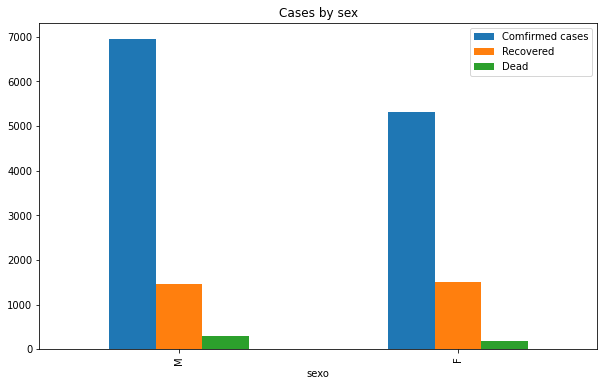

In [32]:
# Plotting data
colombia_by_sex_pandas_merge.plot.bar(figsize=(10,6)).legend(["Comfirmed cases", "Recovered", "Dead"])
plt.title('Cases by sex')
plt.show()